<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  📌  Trực Quan Hóa Dữ Liệu - 21_21 📌
  
   Lab 1
</div>

# 3. EDA ( Chú ý khi sử dụng 'df' để tránh thay đổi df gốc)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df = pd.read_csv("data/US_Accidents_processed.csv")
time_cols=['Start_Time','End_Time','Weather_Timestamp']
for col in time_cols:
    df[col]=pd.to_datetime(df[col], format='mixed')

## 3.1 Khám phá mỗi quan hệ giữa các biến

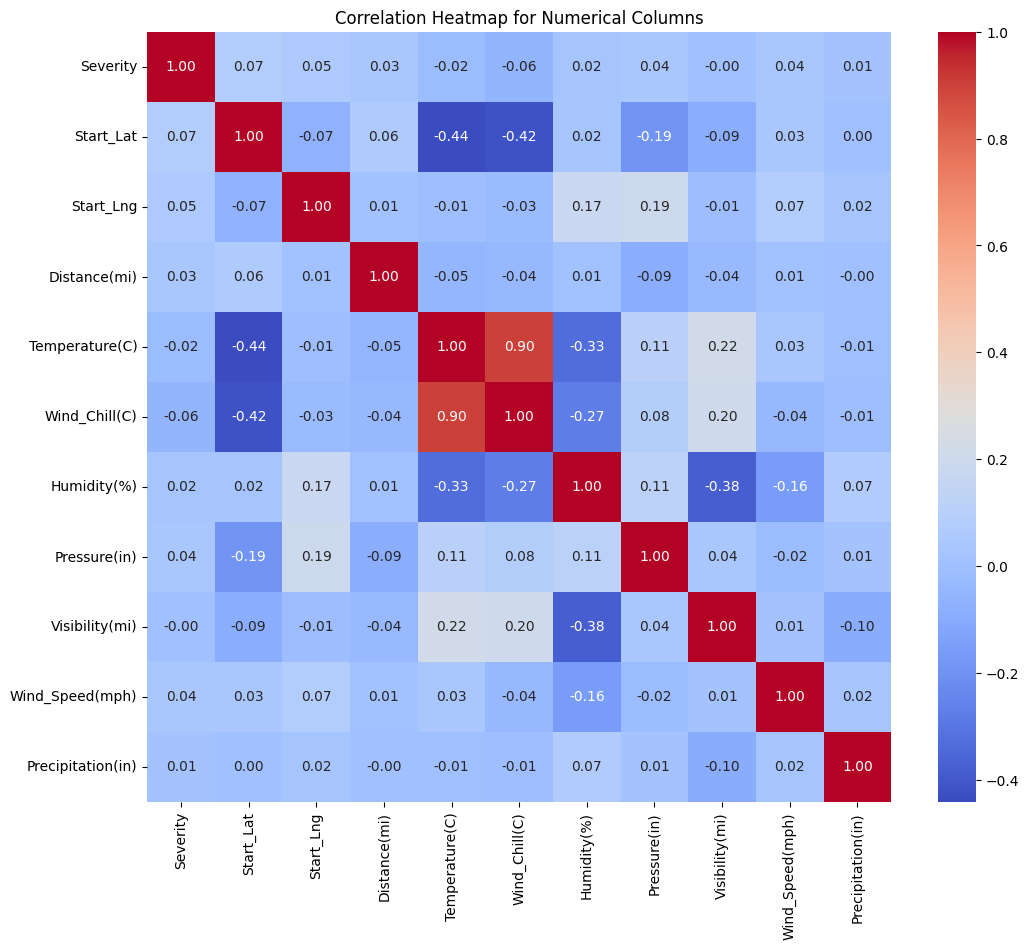

In [3]:
# variable_pairs = [(x, y) for i, x in enumerate(numerical_cols) for j, y in enumerate(numerical_cols) if i < j]

numerical_df = df.select_dtypes(include=[np.number])

# Tính toán ma trận tương quan
correlation_matrix = numerical_df.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

**Comment**

In [6]:
col = ['Start_Lat','Start_Lng']
df[col]

,Start_Lat,Start_Lng
0,26.706900,-80.119360
1,38.781024,-121.265820
2,33.985249,-84.269348
3,47.118706,-122.556908
4,33.451355,-111.890343
...,...,...
772834,35.222715,-118.563713
772835,40.486545,-104.991520
772836,35.184391,-82.154457
772837,30.448699,-91.138913


## 3.2 Các câu hỏi khám phá dữ liệu

In [7]:
import folium
from folium.plugins import MarkerCluster

# # Tạo một bản đồ với tọa độ trung bình của dữ liệu
# map_center = [df['Start_Lat'].median(), df['Start_Lng'].median()]
# m = folium.Map(location=map_center, zoom_start=5)

# # Thêm các đánh dấu cho từng điểm
# mc = MarkerCluster()
# for idx, row in df.iterrows():
#     popup_text = f"Start_Lat: {row['Start_Lat']}, Start_Lng: {row['Start_Lng']}"
#     mc.add_child(folium.Marker([row['Start_Lat'], row['Start_Lng']], popup=popup_text))

# m.add_child(mc)

m